# SF Salaries 

## Project Design Writeup

### Requirements:

Well-articulated problem statement with "specific aim" and hypothesis, based on your lightning talk.

An outline of any potential methods and models.

Detailed explanation of the available data. (i.e., build a data dictionary or link to pre-built data dictionaries)

Describe any outstanding questions, assumptions, risks, and caveats.

Demonstrate domain knowledge, including specific features or relevant benchmarks from similar projects.

Define your goals and criteria, in order to explain what success looks like.

Below is a guide to help you complete the project design writeup. The questions for each section are merely there to suggest what the baseline should cover; be sure to use detail as it will make the project much easier to approach as the class moves on.

### Project Problem and Hypothesis

What's the project about? What problem are you solving?

Where does this seem to reside as a machine learning problem? Are you predicting some continuous number, or predicting a binary value?

What kind of impact do you think it could have?

What do you think will have the most impact in predicting the value you are interested in solving for?

### Datasets

Description of data set available, at the field level.

If from an API, include a sample return. (this is usually included in API documentation!)

### Domain knowledge

What experience do you already have around this area?

Does it relate or help inform the project in any way?

What other research efforts exist?

Use a quick Google search to see what approaches others have made, or talk with your colleagues if it is work related about previous attempts at similar problems.

This could even just be something like "the marketing team put together a forecast in excel that doesn't do well."

Include a benchmark, how other models have performed, even if you are unsure what the metric means.

### Project Concerns

What questions do you have about your project? What are you not sure you quite yet understand? (The more honest you are about this, the easier your instructors can help)

What are the assumptions and caveats to the problem?

    What data do you not have access to but wish you had?

    What is already implied about the observations in your data set? For example, if your primary data set is twitter data, it may not be representative of the whole sample. (say, predicting who would win an election)

What are the risks to the project?

    What's the cost of your model being wrong? (What's the benefit of your model being right?)

    Is any of the data incorrect? Could it be incorrect?

### Outcomes

What do you expect the output to look like?

What does your target audience expect the output to look like?

What gain do you expect from your most important feature on its own?

How complicated does your model have to be?

How successful does your project have to be in order to be considered a "success"?

What will you do if the project is a bust (this happens! but it shouldn't here)?

## Exploratory Analysis Writeup

# Requirements:

A well organized Jupyter notebook with code and fully ran top to bottom.

At least one visual for each independent variable and, if possible, its relationship to your dependent variable.

    It's just as important to show what's not correlated as it is to show any actual correlations found.

    Visuals should be well labeled and intuitive based on the data types.
        
        For example, if your x variable is temperature and y is "did it rain," a reasonable visual would be two histograms of temperature, one where it rained, and one where it didn't.

    Tables are a perfectly valid visualization tool! Interweave them into your work.

Provide insight about dataset and its impact on your hypothesis.

In [97]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [98]:
# Import dataset
df_salaries = pd.read_csv('datasets/sf-salaries/Salaries.csv')
df_salaries.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,...,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,...,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,...,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,...,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,...,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,...,326373.19,2011,NaN,San Francisco,NaN


In [99]:
df_salaries.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [100]:
# find out null data
df_salaries.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [101]:
# fill empty data with 0
df_salaries["BasePay"] = pd.to_numeric(df_salaries['BasePay'], errors='coerce').fillna(0)
df_salaries["OvertimePay"] = pd.to_numeric(df_salaries['OvertimePay'], errors='coerce').fillna(0)
df_salaries["OtherPay"] = pd.to_numeric(df_salaries['OtherPay'], errors='coerce').fillna(0)
df_salaries["Benefits"] = pd.to_numeric(df_salaries['Benefits'], errors='coerce').fillna(0)

In [102]:
df_salaries.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [103]:
# drop the useless columns
df_salaries = df_salaries.drop(['Id','Notes'],axis =1)
df_salaries.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,...,TotalPay,TotalPayBenefits,Year,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,...,567595.43,567595.43,2011,San Francisco,NaN
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,...,538909.28,538909.28,2011,San Francisco,NaN
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,...,335279.91,335279.91,2011,San Francisco,NaN
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,...,332343.61,332343.61,2011,San Francisco,NaN
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,...,326373.19,326373.19,2011,San Francisco,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000169CAA90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000192C9518>]], dtype=object)

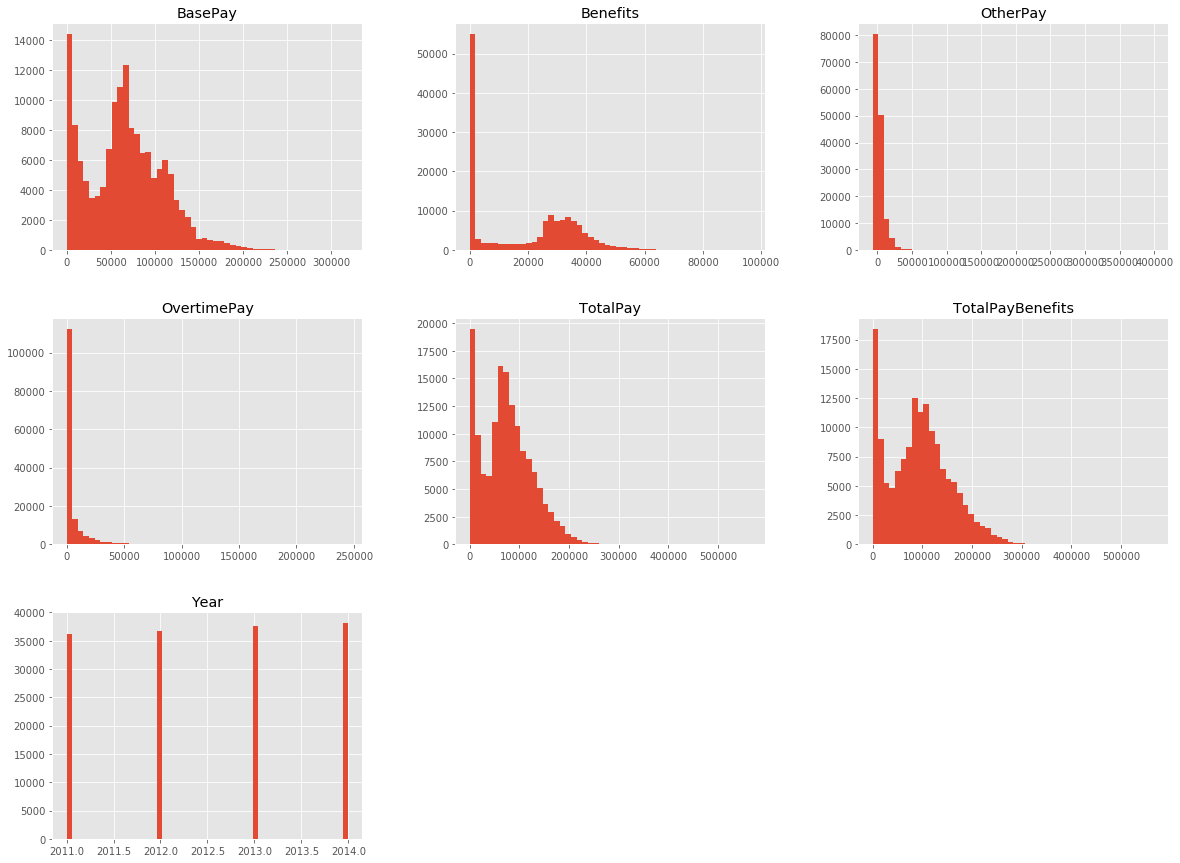

In [28]:
df_salaries.hist(bins=50, figsize=(20,15))

In [104]:
# The average paid(TotalPayBenefits) of all employees per year 
df_salaries.groupby('Year').mean()['TotalPayBenefits']

Year
2011     71744.103871
2012    100553.229232
2013    101440.519714
2014    100250.918884
Name: TotalPayBenefits, dtype: float64

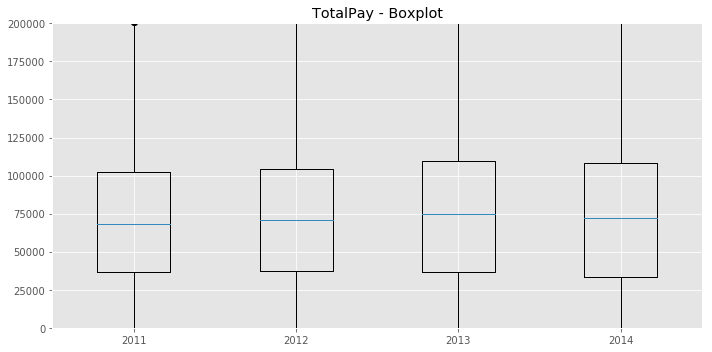

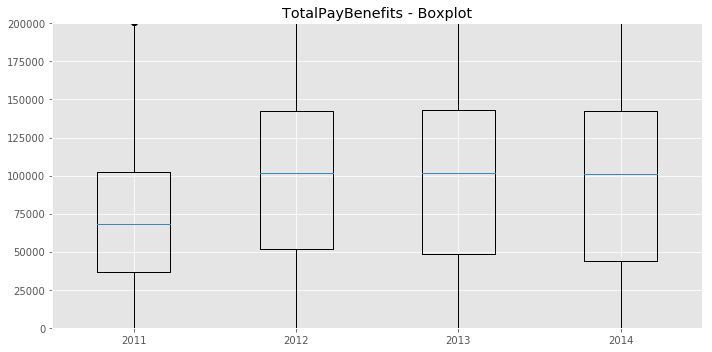

In [113]:
# BoxPlot Data
y2011 = df_salaries.loc[df_salaries['Year'] == 2011] 
y2012 = df_salaries.loc[df_salaries['Year'] == 2012] 
y2013 = df_salaries.loc[df_salaries['Year'] == 2013] 
y2014 = df_salaries.loc[df_salaries['Year'] == 2014]

plt.figure(figsize=(10,5))
plt.boxplot([y2011.TotalPay, y2012.TotalPay, y2013.TotalPay, y2014.TotalPay])
plt.ylim(0,200000) #limit of y
plt.title('TotalPay - Boxplot')
plt.xticks([1,2,3,4],['2011','2012','2013','2014'])
plt.tight_layout()

plt.figure(figsize=(10,5))
plt.boxplot([y2011.TotalPayBenefits, y2012.TotalPayBenefits, y2013.TotalPayBenefits, y2014.TotalPayBenefits])
plt.ylim(0,200000) #limit of y
plt.title('TotalPayBenefits - Boxplot')
plt.xticks([1,2,3,4],['2011','2012','2013','2014'])
plt.tight_layout()

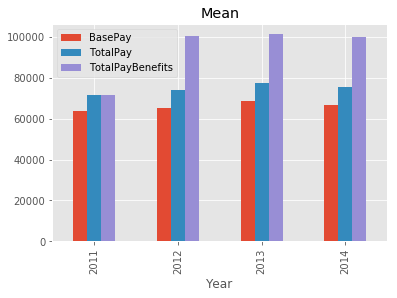

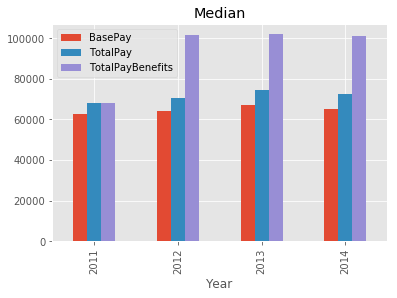

In [119]:
plotTableMean = df_salaries[["Year", "BasePay", "TotalPay", "TotalPayBenefits"]].groupby("Year").mean()
plotTableMean.plot(kind="bar", title = "Mean")
plotTableMedian = df_salaries[["Year", "BasePay", "TotalPay", "TotalPayBenefits"]].groupby("Year").median()
plotTableMedian.plot(kind="bar", title = "Median")

In [105]:
# How many job titles
df_salaries['JobTitle'].nunique()

2159

In [106]:
# How many people in each job title, shown top 20
df_salaries.JobTitle.value_counts().head(20)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Deputy Sheriff                  1933
Police Officer                  1476
SPECIAL NURSE                   1402
Public Service Trainee          1328
REGISTERED NURSE                1219
Police Officer 2                1141
Attorney (Civil/Criminal)       1126
Porter                          1095
Sergeant 3                      1047
General Laborer                 1033
Name: JobTitle, dtype: int64